In [45]:
import pickle

In [46]:
import os

In [47]:
og_path = os.getcwd()

In [48]:
og_path

'/lustre/work/statgrads/vpiyush2/DeepCDR_MEnKF-ANN'

In [4]:
# DeepCDR_MEnKF-ANN/DeepCDR_MEnKF-ANN_all_drugs_all_omics

In [49]:
path_hit = os.path.join(og_path, 'DeepCDR_MEnKF-ANN_all_drugs_all_omics')

In [50]:
path_hit

'/lustre/work/statgrads/vpiyush2/DeepCDR_MEnKF-ANN/DeepCDR_MEnKF-ANN_all_drugs_all_omics'

In [8]:
# os.chdir(path_hit)

In [57]:
# path_hit + "//" + 'Real_World_EnKF_DeepCDR_Neurons_16_Gamma_500_var_weights_1_num_ens_801.pkl'

In [58]:
with open(path_hit + "//" + 'Real_World_EnKF_DeepCDR_Neurons_16_Gamma_500_var_weights_0.5_num_ens_801.pkl', 'rb') as f:
    deepcdr= pickle.load(f)  

In [59]:
import matplotlib.pyplot as plt

In [63]:
cur_idx = 1

In [64]:
import numpy as np

In [66]:
# deepcdr[cur_idx-1]

In [67]:
# deepcdr[cur_idx-1]

In [68]:
# path = r"/lustre/work/statgrads/vpiyush2/enkf_simulations/Old_Strategy_EnKF_LSTM_Doc2Vec_Simulations/DeepCDR/dataset_" + str(cur_idx) + "/"

## read in all the labels 
## for train test and valid
# y_train = np.load(path + "//" + "train_y.npy")
# y_valid = np.load(path + "//" + "valid_y.npy")
y_test = np.load('DeepCDR_MEnKF-ANN_all_drugs_all_omics/dataset_' + str(cur_idx) + "//" + "test_y.npy")
    

In [108]:
# y_test

In [86]:
from sklearn.metrics import mean_squared_error

In [95]:
import seaborn as sns
import random

In [96]:
idx = np.sort(random.sample(range(0, y_test.shape[0]), k = 7))

In [97]:
idx

array([18, 24, 48, 50, 70, 94, 97])

In [98]:
to_compare = y_test.reshape(-1,1)[idx,:]

In [99]:
import pandas as pd

In [100]:
catch = []
for i in idx: 
    preds = deepcdr[cur_idx-1][-1][:,i,:]
    preds_df = pd.DataFrame(preds)
    preds_df.columns = ["EnKF_Preds"]
    preds_df["idx"] = i
    catch.append(preds_df)

In [101]:
all_df = pd.concat(catch)

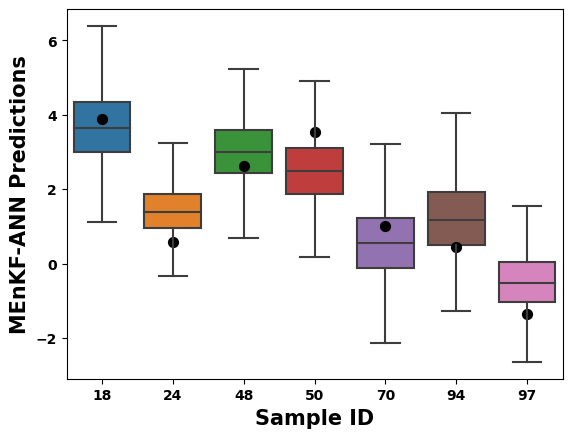

In [102]:
sns.boxplot(data=all_df, x="idx", y="EnKF_Preds", showfliers = False)
plt.scatter(range(0, len(idx)), to_compare, s = 50, c = "black")
plt.xlabel("Sample ID", fontweight = "bold", fontsize = 15)
plt.ylabel("MEnKF-ANN Predictions", fontweight = "bold", fontsize = 15)
plt.xticks(fontweight = "bold", fontsize = 10)
plt.yticks(fontweight = "bold", fontsize = 10)
plt.show()